In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)
coordinates

[(44.33997557727298, 101.50997387118866),
 (-65.66311757605732, 71.84931016749968),
 (-77.50192967239079, 128.41046303330995),
 (39.513662439177295, 163.95411643534993),
 (-8.360466530065253, -32.78266439378248),
 (-33.361443526939325, 5.806300930874073),
 (-45.603135026087905, 128.86906316122827),
 (82.7903321368498, 63.0017078736596),
 (45.212052305040544, 66.8903510643988),
 (17.60144294094286, 43.527085379317555),
 (4.176813448715649, 144.64006278161423),
 (51.882871647968955, 165.61852507711245),
 (-10.372706028719932, -58.10644590856927),
 (-5.487417715367954, -172.07710140165983),
 (-83.01097407615434, 37.65011824374153),
 (9.639888844752278, 80.01536739469475),
 (-28.326173423352493, 169.48168336714792),
 (28.942177721611046, -47.15906532330115),
 (-45.986223436717154, -59.02224284530948),
 (-43.13145092166581, -86.84579705156386),
 (-0.9414363627635112, -143.87070443331493),
 (-78.36687765466243, -30.979111696731252),
 (-49.04865807947587, -40.390184209747645),
 (54.8904082086

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = (citipy.nearest_city(coordinate[0], coordinate[1]).city_name)
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print((cities))

['hovd', 'saint-philippe', 'new norfolk', 'severo-kurilsk', 'olinda', 'luderitz', 'port lincoln', 'amderma', 'shieli', 'najran', 'lorengau', 'nikolskoye', 'alta floresta', 'saleaula', 'port elizabeth', 'jaffna', 'vao', 'saint george', 'viedma', 'castro', 'atuona', 'ushuaia', 'rocha', 'moose factory', 'rikitea', 'makakilo city', 'barrow', 'hasaki', 'jacareacanga', 'tura', 'quartucciu', 'qaanaaq', 'geraldton', 'hobart', 'kununurra', 'marzuq', 'tasiilaq', 'faanui', 'cape town', 'mayo', 'fortuna', 'juneau', 'codrington', 'hualmay', 'albany', 'bredasdorp', 'hofn', 'khuzhir', 'cayenne', 'beyneu', 'praia da vitoria', 'porto nacional', 'mataura', 'east london', 'louisbourg', 'dikson', 'beira', 'portland', 'bengkulu', 'acapulco', 'aklavik', 'attawapiskat', 'grimshaw', 'daru', 'tiksi', 'akdepe', 'norman wells', 'taolanaro', 'jamestown', 'dzhusaly', 'bluff', 'ribeira grande', 'udachnyy', 'vaini', 'punta arenas', 'andenes', 'jumla', 'talnakh', 'yellowknife', 'port macquarie', 'pangai', 'nanortalik

In [5]:
# create an empty list for weather data
city_data =[]
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    print(i)
    if (i % 50==0 and i >= 50):
        set_count += 1
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
     # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        city_weather = requests.get(city_url).json()
        # Parse the JSON and retrieve data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
    
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
0
Processing Record 1 of Set 1 | hovd
1
Processing Record 2 of Set 1 | saint-philippe
2
Processing Record 3 of Set 1 | new norfolk
3
Processing Record 4 of Set 1 | severo-kurilsk
4
Processing Record 5 of Set 1 | olinda
5
Processing Record 6 of Set 1 | luderitz
6
Processing Record 7 of Set 1 | port lincoln
7
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
8
Processing Record 9 of Set 1 | shieli
9
Processing Record 10 of Set 1 | najran
10
Processing Record 11 of Set 1 | lorengau
11
Processing Record 12 of Set 1 | nikolskoye
12
Processing Record 13 of Set 1 | alta floresta
13
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
14
Processing Record 15 of Set 1 | port elizabeth
15
Processing Record 16 of Set 1 | jaffna
16
Processing Record 17 of Set 1 | vao
17
Processing Record 18 of Set 1 | saint george
18
Processing Record 19 of Set 1 | viedma
19
Processing Record 20 of Set 1 | castro
20
Proces

In [6]:
print(len(city_data))

570


In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hovd,48.01,91.64,26.58,85,0,1.66,MN,2020-10-31 18:47:49
1,Saint-Philippe,-21.36,55.77,68.00,64,0,6.93,RE,2020-10-31 18:43:38
2,New Norfolk,-42.78,147.06,55.40,66,90,6.93,AU,2020-10-31 18:43:10
3,Severo-Kurilsk,50.68,156.12,42.53,73,91,21.83,RU,2020-10-31 18:44:14
4,Olinda,-8.01,-34.86,84.20,70,40,11.41,BR,2020-10-31 18:45:27
5,Luderitz,-26.65,15.16,66.88,45,0,24.00,NA,2020-10-31 18:43:29
6,Port Lincoln,-34.73,135.87,53.80,87,2,11.83,AU,2020-10-31 18:44:00
7,Shieli,44.17,66.75,45.41,52,0,7.23,KZ,2020-10-31 18:47:51
8,Najran,17.49,44.13,68.00,32,0,1.23,SA,2020-10-31 18:43:55
9,Lorengau,-2.02,147.27,81.18,77,8,6.17,PG,2020-10-31 18:44:36


In [8]:
new_order_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[new_order_column] 
city_data_df .head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2020-10-31 18:47:49,48.01,91.64,26.58,85,0,1.66
1,Saint-Philippe,RE,2020-10-31 18:43:38,-21.36,55.77,68.00,64,0,6.93
2,New Norfolk,AU,2020-10-31 18:43:10,-42.78,147.06,55.40,66,90,6.93
3,Severo-Kurilsk,RU,2020-10-31 18:44:14,50.68,156.12,42.53,73,91,21.83
4,Olinda,BR,2020-10-31 18:45:27,-8.01,-34.86,84.20,70,40,11.41
5,Luderitz,NA,2020-10-31 18:43:29,-26.65,15.16,66.88,45,0,24.00
6,Port Lincoln,AU,2020-10-31 18:44:00,-34.73,135.87,53.80,87,2,11.83
7,Shieli,KZ,2020-10-31 18:47:51,44.17,66.75,45.41,52,0,7.23
8,Najran,SA,2020-10-31 18:43:55,17.49,44.13,68.00,32,0,1.23
9,Lorengau,PG,2020-10-31 18:44:36,-2.02,147.27,81.18,77,8,6.17


In [9]:
# Create the output file (CSV).
file_to_save = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(file_to_save, index_label="City ID")

In [10]:
# Create the output file (CSV).
file_to_save = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(file_to_save, index_label="City ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

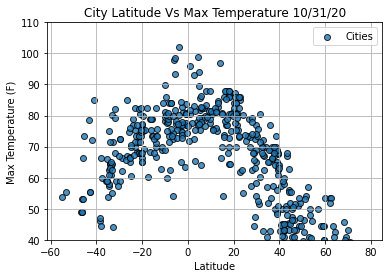

In [12]:
import time
plt.scatter(lats, max_temps, alpha=0.8, edgecolor="Black", linewidths=1, marker="o", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(40,110)
plt.title(f"City Latitude Vs Max Temperature " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

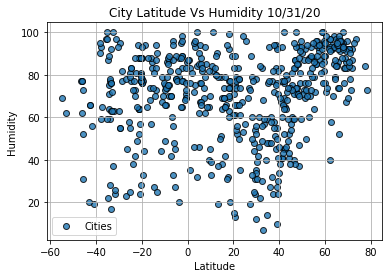

In [13]:
# Scatter plot for latitide vs humidity
plt.scatter(lats, humidity, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude Vs Humidity " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

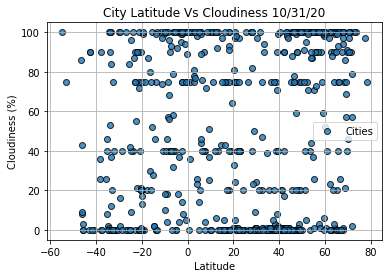

In [14]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, cloudiness, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

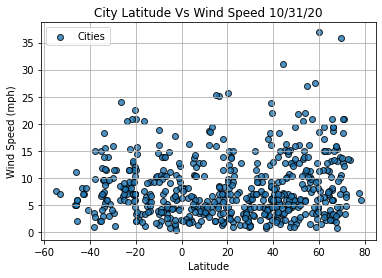

In [15]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, wind_speed, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude Vs Wind Speed " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
from scipy.stats import linregress
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
(slope, intercept, r_value, p_value, std_err)

(-0.46063820851964815,
 68.01126197024972,
 -0.679060295366296,
 2.7218666313340247e-78,
 0.020894035243795284)

In [17]:
# Get the equation of the line.
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)
print(f"p value is {p_value:.2f}")

y =-0.46x +68.01
p value is 0.00


In [18]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(slope*lat) + intercept for lat in lats]
regress_values

[45.89602157922141,
 77.8504941042294,
 87.71736453072026,
 44.66611756247395,
 71.7009740204921,
 80.28727022729834,
 84.0092269521371,
 47.66487229993686,
 59.954699703241076,
 68.94175115145941,
 40.511160921626725,
 72.56236747042385,
 83.63611000323618,
 63.55689049386472,
 78.45393015739015,
 50.92158443417077,
 86.80990725993657,
 79.4304831594518,
 72.52551641374227,
 93.25423579712644,
 83.89406740000719,
 44.39894740153255,
 78.66121735122398,
 58.17663621835523,
 35.172364084884,
 51.552658779842695,
 70.87643162724193,
 56.2557748888283,
 49.93121228585353,
 32.32101357414738,
 81.26382322936,
 87.76342835157223,
 75.27552651860456,
 61.37807176756679,
 37.788789109275605,
 75.60257964665352,
 83.64071638532138,
 50.0970420409206,
 49.309350704352,
 41.15605441355423,
 85.63988621029665,
 73.12434608481782,
 48.388074287312705,
 83.91709931043317,
 38.415257072862325,
 43.509915659089636,
 65.74031560224786,
 47.135138360139266,
 50.17074415428375,
 72.94469718349515,
 89.2

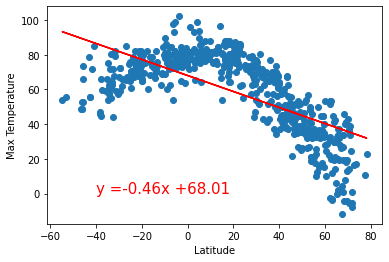

In [19]:
# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq,(-40,0), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression (x_values, y_values,title,y_label,text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    regress_values = [(slope*x) + intercept for x in x_values]
    # Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

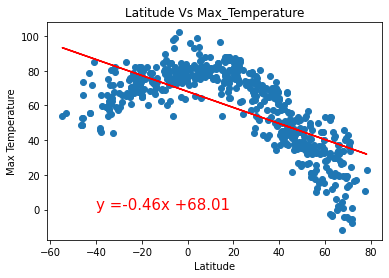

In [21]:
plot_linear_regression(lats,max_temps,"Latitude Vs Max_Temperature", "Max Temperature", (-40,0))

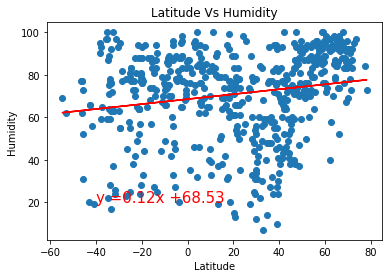

In [22]:
plot_linear_regression(lats,humidity,"Latitude Vs Humidity", "Humidity", (-40, 20))

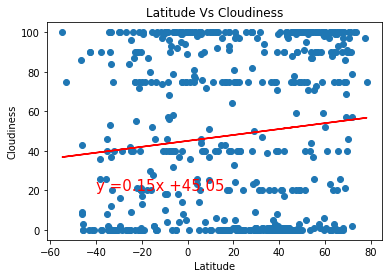

In [23]:
plot_linear_regression(lats,cloudiness,"Latitude Vs Cloudiness", "Cloudiness", (-40, 20))

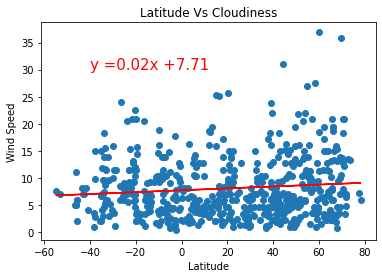

In [24]:
plot_linear_regression(lats,wind_speed,"Latitude Vs Cloudiness", "Wind Speed", (-40, 30))

In [25]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2020-10-31 18:47:49,48.01,91.64,26.58,85,0,1.66
1,Saint-Philippe,RE,2020-10-31 18:43:38,-21.36,55.77,68.00,64,0,6.93
2,New Norfolk,AU,2020-10-31 18:43:10,-42.78,147.06,55.40,66,90,6.93
3,Severo-Kurilsk,RU,2020-10-31 18:44:14,50.68,156.12,42.53,73,91,21.83
4,Olinda,BR,2020-10-31 18:45:27,-8.01,-34.86,84.20,70,40,11.41
5,Luderitz,NA,2020-10-31 18:43:29,-26.65,15.16,66.88,45,0,24.00
6,Port Lincoln,AU,2020-10-31 18:44:00,-34.73,135.87,53.80,87,2,11.83
7,Shieli,KZ,2020-10-31 18:47:51,44.17,66.75,45.41,52,0,7.23
8,Najran,SA,2020-10-31 18:43:55,17.49,44.13,68.00,32,0,1.23
9,Lorengau,PG,2020-10-31 18:44:36,-2.02,147.27,81.18,77,8,6.17


In [26]:
index13 = city_data_df.loc[13]
index13.dtypes

dtype('O')

In [27]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2020-10-31 18:47:49,48.01,91.64,26.58,85,0,1.66
3,Severo-Kurilsk,RU,2020-10-31 18:44:14,50.68,156.12,42.53,73,91,21.83
7,Shieli,KZ,2020-10-31 18:47:51,44.17,66.75,45.41,52,0,7.23
8,Najran,SA,2020-10-31 18:43:55,17.49,44.13,68.00,32,0,1.23
10,Nikolskoye,RU,2020-10-31 18:44:36,59.70,30.79,39.99,82,98,4.47


In [28]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saint-Philippe,RE,2020-10-31 18:43:38,-21.36,55.77,68.00,64,0,6.93
2,New Norfolk,AU,2020-10-31 18:43:10,-42.78,147.06,55.40,66,90,6.93
4,Olinda,BR,2020-10-31 18:45:27,-8.01,-34.86,84.20,70,40,11.41
5,Luderitz,NA,2020-10-31 18:43:29,-26.65,15.16,66.88,45,0,24.00
6,Port Lincoln,AU,2020-10-31 18:44:00,-34.73,135.87,53.80,87,2,11.83


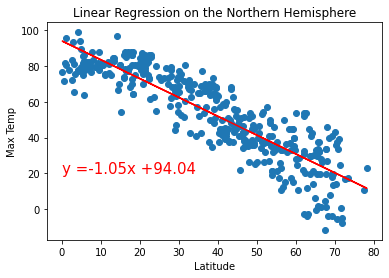

In [29]:
# Perform linear regression on Souther hemispear
northern_lat = northern_hemi_df["Lat"]
northern_temp = northern_hemi_df["Max Temp"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_temp, "Linear Regression on the Northern Hemisphere", "Max Temp", (0,20))

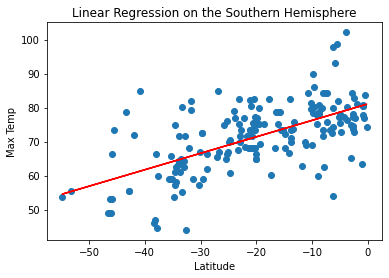

In [30]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_temp = southern_hemi_df["Max Temp"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_temp, "Linear Regression on the Southern Hemisphere", "Max Temp", (-50,40))

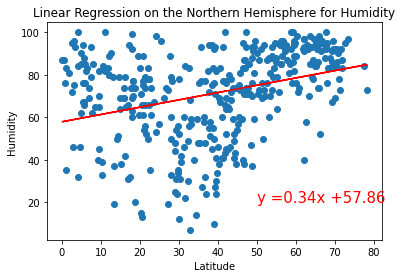

In [31]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_humid = northern_hemi_df["Humidity"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_humid, "Linear Regression on the Northern Hemisphere for" +
                       " Humidity", "Humidity", (50,20))

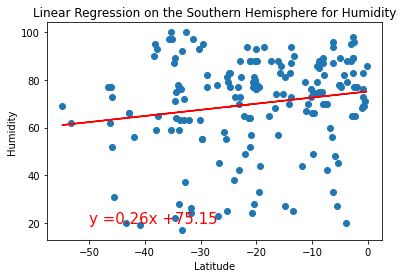

In [32]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_humid = southern_hemi_df["Humidity"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_humid, "Linear Regression on the Southern Hemisphere for Humidity", "Humidity", (-50,20))

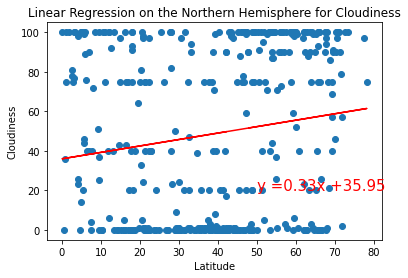

In [33]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_cloudiness, "Linear Regression on the Northern Hemisphere for" +
                       " Cloudiness", "Cloudiness", (50,20))

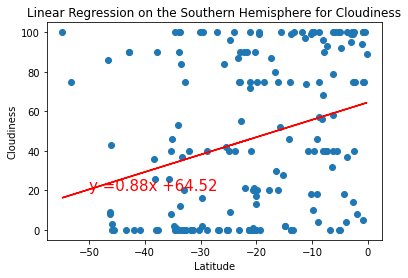

In [34]:
# Perform linear regression on Southern hemispear
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_cloudiness, "Linear Regression on the Southern Hemisphere for Cloudiness", "Cloudiness", (-50,20))

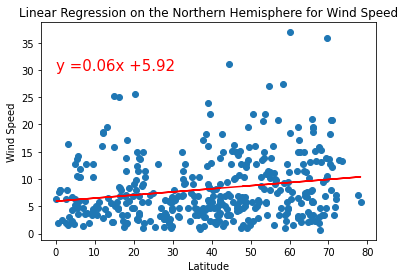

In [35]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_windspeed = northern_hemi_df["Wind Speed"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_windspeed, "Linear Regression on the Northern Hemisphere for" +
                       " Wind Speed", "Wind Speed", (0,30))

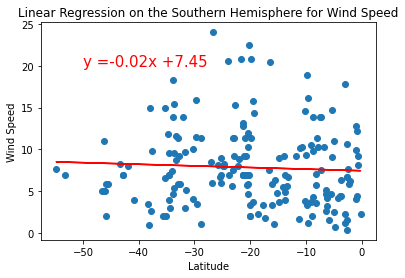

In [36]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_windspeed = southern_hemi_df["Wind Speed"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_windspeed, "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed", (-50,20))